## Machine Learning Classification Project
### By: Passant Hamdi

In this project, we are going to build a model to classify articles into 3 categories, and then split each category into 4 groups.

### 1. Exploring The Data

In [1]:
#First, let's import the necessary libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# To hide warning messages.
import warnings
warnings.filterwarnings('ignore') 

In [2]:
#Now we load the data
data = pd.read_json('articles.json')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2481 entries, 0 to 2480
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   body      2481 non-null   object
 1   title     2481 non-null   object
 2   category  2481 non-null   object
dtypes: object(3)
memory usage: 29.1+ KB


Great ! we don't have any missing data.

In [3]:
#Let's explore the data more by viewing the first rows
data.head()

,body,title,category
0,Protecting Netflix Viewing Privacy at Scale\r\...,Protecting Netflix Viewing Privacy at Scale,Engineering
1,Introducing Winston — Event driven Diagnostic ...,Introducing Winston - Event driven Diagnostic ...,Engineering
2,Performance & Usage at Instagram\r\n\r\nAt Ins...,Performance & Usage at Instagram,Engineering
3,The simple example of calculating and formatti...,Refactoring a javascript video store,Engineering
4,Billing applications have transactions that ne...,Netflix Billing Migration to AWS - Part III,Engineering


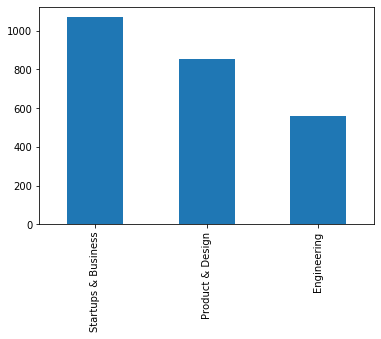

In [4]:
#checking if our data is balanced or not
data.category.value_counts().plot(kind='bar');

In [5]:
data.category.value_counts()

Startups & Business    1071
Product & Design        852
Engineering             558
Name: category, dtype: int64

The data is not well balanced.

In [6]:
#Let's view samples of the data
def print_plot(index):
    sample = data[data.index == index][['title', 'category']].values[0]
    if len(sample) > 0:
        print(sample[0])
        print('category:', sample[1])
        
print_plot(5)
print_plot(20)
print_plot(50)

Distributed Resource Scheduling with Apache Mesos
category: Engineering
Sprint: Wednesday
category: Startups & Business
It’s All A/Bout Testing: The Netflix Experimentation Platform
category: Engineering


In [7]:
#Let's view samples of the data
def print_plot(index):
    sample = data[data.index == index][['body', 'category']].values[0]
    if len(sample) > 0:
        print(sample[0])
        print('category:', sample[1])
        
print_plot(5)
print_plot(20)
print_plot(50)

Distributed Resource Scheduling with Apache Mesos

Netflix uses Apache Mesos to run a mix of batch, stream processing, and service style workloads. For over two years, we have seen an increased usage for a variety of use cases including real time anomaly detection, training and model building batch jobs, machine learning orchestration, and Node.js based microservices. The recent release of Apache Mesos 1.0 represents maturity of the technology that has evolved significantly since we first started to experiment with it.

Our initial use of Apache Mesos was motivated by fine grained resource allocation to tasks of various sizes that can be bin packed to a single EC2 instance. In the absence of Mesos, or a similar resource manager, we would have had to forego fine grained allocation for increased number of instances with suboptimal usage, or develop a technology similar to Mesos, or at least a subset of it.

The increasing adoption of containers for stream processing and batch jobs contin

We are going to build a model to predict the category of an article by its body

In [8]:
#Counting the number of words in the 'body' column
data['body'].apply(lambda x: len(x.split(' '))).sum()

3963551

### 2. Preprocessing The Data

Preprocessing our data by converting all words in "body" column to lower case, tokenize and remove stop words and apply stemming.

In [9]:
# Initialize the stemmer
from nltk.stem.porter import PorterStemmer


stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

data["body"] = data["body"].apply(lambda text: stem_words(text))
data.head()

,body,title,category
0,protect netflix view privaci at scale On the o...,Protecting Netflix Viewing Privacy at Scale,Engineering
1,introduc winston — event driven diagnost and r...,Introducing Winston - Event driven Diagnostic ...,Engineering
2,"perform & usag at instagram At instagram, we t...",Performance & Usage at Instagram,Engineering
3,the simpl exampl of calcul and format a bill f...,Refactoring a javascript video store,Engineering
4,bill applic have transact that need acid compl...,Netflix Billing Migration to AWS - Part III,Engineering


In [10]:
#Convert all the words to lower case. This is required as python interprets 'finish' and 'FINISH' differently
data["body"] = data["body"].str.lower()

In [11]:
import re
from nltk.corpus import stopwords


REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]') #Remove punctuation
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]') #Remove all unnecessary symbols
Stop_Words = set(stopwords.words('english')) #Remove stop words

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in Stop_Words) # delete stopwors from text
    return text

data['body'] = data['body'].apply(clean_text)

In [12]:
#Now let's review our data after the preparing
data.body

0       protect netflix view privaci scale open connec...
1       introduc winston event driven diagnost remedi ...
2       perform usag instagram instagram treat perform...
3       simpl exampl calcul format bill video store op...
4       bill applic transact need acid complianc proce...
                              ...                        
2476    earli stage focu unit econom profitability cor...
2477    5 tip nail success product launch past two yea...
2478    rout defens ai startup simpl framework underst...
2479    faster faster faster id like talk fast left bu...
2480    netflix place peopl win exceed expectations co...
Name: body, Length: 2481, dtype: object

In [13]:
print_plot(50)

bout testing netflix experiment platform ever wonder netflix serv great stream experi highqual video minim playback interruptions thank team engin data scientist constantli b test innov adapt stream content deliveri network algorithms obviou changes complet redesign ui layout new person homepage yes thoroughli b tested fact everi product chang netflix consid goe rigor b test process befor becom default user experience major redesign like one abov greatli improv servic allow member find content want watch faster however riski roll without extens b testing enabl us prove new experi prefer old ever wonder whether realli set test everyth possible consid even imag associ mani titl b tested sometim result 20 30 view title result like highlight whi obsess b testing follow empir approach ensur product chang driven opinion vocal netflix employees instead actual data allow member themselv guid us toward experi love thi post wer go discuss experiment platform servic make possibl everi netflix eng

In [14]:
data['body'].apply(lambda x: len(x)).sum()

14939004

We cleaned up more than one million unnecessary words from our data.
Now the data is ready for the classification model.

### 3. Splitting the Data

In [15]:
from sklearn.model_selection import train_test_split

X = data['body']
y = data['category']

# Split the 'body' and 'category' data into training and testing sets, with 20% of the data for test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle = True,random_state = 0)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.2, random_state= 0) # 0.25 x 0.8 = 0.2 (20% of the data for validation)


#Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Validation set has {} samples.".format(X_val.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1587 samples.
Validation set has 397 samples.
Testing set has 497 samples.


In [16]:
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val)
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

Now it's time to choose our classification algorithm and start training the data.

Our classifier is Linear Support Vector Machine

### 4. Implementing The Classifier

#### We are going to use Stochastic Gradient Descent SGD Classifier

In [17]:
#SGDClassifier model, we are ging to use CountVectorizer to transform the text into a vector.

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [18]:
y_pred_val = sgd.predict(X_val)

print('accuracy %s' % accuracy_score(y_pred_val, y_val))

accuracy 0.853904282115869


Here we have 85.39% accuracy which is very good.

In [19]:
#Let's predict the category for the test data
y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.8752515090543259


In [20]:
classes= ['Startups & Business', 'Product & Design', 'Engineering']
print(classification_report(y_test, y_pred,target_names=classes))

                     precision    recall  f1-score   support

Startups & Business       0.93      0.91      0.92       110
   Product & Design       0.90      0.82      0.85       179
        Engineering       0.83      0.91      0.87       208

           accuracy                           0.88       497
          macro avg       0.89      0.88      0.88       497
       weighted avg       0.88      0.88      0.88       497



The prediction accuracy for the test data set is 88%.

#### Now we need to cluster each of the three categories into 4 groups.

We are going to use K-Means clustering algorithm. 

Will extract each category and apply K-Means algorithm

In [21]:
Eng_Cluster = data.loc[data.category =="Engineering"]
Eng_Cluster

,body,title,category
0,protect netflix view privaci scale open connec...,Protecting Netflix Viewing Privacy at Scale,Engineering
1,introduc winston event driven diagnost remedi ...,Introducing Winston - Event driven Diagnostic ...,Engineering
2,perform usag instagram instagram treat perform...,Performance & Usage at Instagram,Engineering
3,simpl exampl calcul format bill video store op...,Refactoring a javascript video store,Engineering
4,bill applic transact need acid complianc proce...,Netflix Billing Migration to AWS - Part III,Engineering
...,...,...,...
2440,recent futurestack 2017 new york melani cebula...,Airbnb's 10 Takeaways from Moving to Microserv...,Engineering
2441,heard apach strut open sourc framework play ro...,Could the Equifax Hack Have Been Prevented by ...,Engineering
2447,long time gitlabcom use singl postgresql datab...,Scaling the GitLab database | GitLab,Engineering
2466,known vs unknown build success compani typing ...,Knowns vs Unknowns - Are you building a succes...,Engineering


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer()

%time tfidf_matrix = tfidf_vectorizer.fit_transform(Eng_Cluster['body']) #fit the vectorizer to body
print(tfidf_matrix.shape)


Wall time: 1.12 s
(558, 30735)


In [23]:
terms = tfidf_vectorizer.get_feature_names()

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

dist is defined as (1 - the cosine) similarity of each document. Cosine similarity is measured against the tf-idf matrix and can be used to generate a measure of similarity between each document and the other documents in the corpus.

In [25]:
#Now we use K-means clustering
from sklearn.cluster import KMeans

num_clusters = 4

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

In [26]:
Eng_Cluster.columns

Index(['body', 'title', 'category'], dtype='object')

In [27]:
#converting list of clusters to dataframe column
df = pd.DataFrame (clusters, columns = ['cluster'])
df = df.astype(str)
print (df)

    cluster
0         1
1         1
2         1
3         1
4         2
..      ...
553       3
554       3
555       2
556       3
557       2

[558 rows x 1 columns]


In [28]:
#changing names of clusters
df['cluster'] = df['cluster'].replace(['0','1', '2', '3'],['group1','group2','group3', 'group4'])
df

,cluster
0,group2
1,group2
2,group2
3,group2
4,group3
...,...
553,group4
554,group4
555,group3
556,group4


In [29]:
#reseting the index before joining the cluster column
Eng_Cluster = Eng_Cluster.reset_index(drop = True)

In [30]:
df = pd.concat([Eng_Cluster, df], axis=1)
df

,body,title,category,cluster
0,protect netflix view privaci scale open connec...,Protecting Netflix Viewing Privacy at Scale,Engineering,group2
1,introduc winston event driven diagnost remedi ...,Introducing Winston - Event driven Diagnostic ...,Engineering,group2
2,perform usag instagram instagram treat perform...,Performance & Usage at Instagram,Engineering,group2
3,simpl exampl calcul format bill video store op...,Refactoring a javascript video store,Engineering,group2
4,bill applic transact need acid complianc proce...,Netflix Billing Migration to AWS - Part III,Engineering,group3
...,...,...,...,...
553,recent futurestack 2017 new york melani cebula...,Airbnb's 10 Takeaways from Moving to Microserv...,Engineering,group4
554,heard apach strut open sourc framework play ro...,Could the Equifax Hack Have Been Prevented by ...,Engineering,group4
555,long time gitlabcom use singl postgresql datab...,Scaling the GitLab database | GitLab,Engineering,group3
556,known vs unknown build success compani typing ...,Knowns vs Unknowns - Are you building a succes...,Engineering,group4


Now we repeat the same for both other categories, 'Startups & Business' and  'Product & Design'

In [31]:
Sup_Cluster = data.loc[data.category =="Startups & Business"]
Sup_Cluster

,body,title,category
7,ok thi one might littl differ evergreen collec...,"How Barriers to Entry Confused Me Terribly, an...",Startups & Business
8,thi articl andi smith author entrepreneur advi...,The Ancient Origins of Storytelling and How Yo...,Startups & Business
9,somewher along continuum art versu scienc deba...,How To Choose The Right Business Ideas,Startups & Business
10,compani cultur annoy subject research mushi ma...,Most Company Culture Posts are Fluffy Bullshit...,Startups & Business
11,great busi dont big big busi awful measur qual...,Why Value Capture is the Most Important Busine...,Startups & Business
...,...,...,...
2474,netflix place peopl win exceed expectations co...,Humans Hate Being Spun: How to Practice Radica...,Startups & Business
2475,true person popular isnt alway answer tricky l...,Why Personalization is Dead (And What to Do In...,Startups & Business
2476,earli stage focu unit econom profitability cor...,"At the Early Stage, Focus on Unit Economic Pro...",Startups & Business
2477,5 tip nail success product launch past two yea...,5 Tips to Nail a Successful Product Launch,Startups & Business


In [32]:
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer()

%time tfidf_matrix = tfidf_vectorizer.fit_transform(Sup_Cluster['body']) #fit the vectorizer to body
print(tfidf_matrix.shape)

terms = tfidf_vectorizer.get_feature_names()

dist = 1 - cosine_similarity(tfidf_matrix)

#Now we use K-means clustering
from sklearn.cluster import KMeans

num_clusters = 4

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)

Startups_clusters = km.labels_.tolist()

#converting list of clusters to dataframe column
df2 = pd.DataFrame (Startups_clusters, columns = ['cluster'])
df2 = df2.astype(str)


#changing names of clusters
df2['cluster'] = df2['cluster'].replace(['0','1', '2', '3'],['group1','group2','group3', 'group4'])


#reseting the index before joining the cluster column
Sup_Cluster = Sup_Cluster.reset_index(drop = True)

df2 = pd.concat([Sup_Cluster, df2], axis=1)
df2

Wall time: 1.55 s
(1071, 34131)


,body,title,category,cluster
0,ok thi one might littl differ evergreen collec...,"How Barriers to Entry Confused Me Terribly, an...",Startups & Business,group2
1,thi articl andi smith author entrepreneur advi...,The Ancient Origins of Storytelling and How Yo...,Startups & Business,group1
2,somewher along continuum art versu scienc deba...,How To Choose The Right Business Ideas,Startups & Business,group4
3,compani cultur annoy subject research mushi ma...,Most Company Culture Posts are Fluffy Bullshit...,Startups & Business,group4
4,great busi dont big big busi awful measur qual...,Why Value Capture is the Most Important Busine...,Startups & Business,group2
...,...,...,...,...
1066,netflix place peopl win exceed expectations co...,Humans Hate Being Spun: How to Practice Radica...,Startups & Business,group4
1067,true person popular isnt alway answer tricky l...,Why Personalization is Dead (And What to Do In...,Startups & Business,group1
1068,earli stage focu unit econom profitability cor...,"At the Early Stage, Focus on Unit Economic Pro...",Startups & Business,group2
1069,5 tip nail success product launch past two yea...,5 Tips to Nail a Successful Product Launch,Startups & Business,group1


In [33]:
Product_Cluster = data.loc[data.category =="Product & Design"]
Product_Cluster

,body,title,category
57,role product manag technolog firm critic impor...,What is Product Management?,Product & Design
62,last year john maeda publish hi inaugur #desig...,Design in Tech Report 2016,Product & Design
64,techmem nuzzel curat newslett book product eve...,My Daily Learning Ritual,Product & Design
65,second half 1990s porsch hatch plan new car an...,Using Pricing to Inform Your Roadmap,Product & Design
66,three way gener trust product jenni wanger aug...,Three Ways of Generating Trust for Your Product,Product & Design
...,...,...,...
2460,point journey climber leader take three rule m...,Customer Inspired; Technology Enabled,Product & Design
2461,product designer guid growth step 1 figur grow...,The Product Designer's Guide to Growth,Product & Design
2468,softwar onli becom valuabl ship customers befo...,Shipping is your company’s heartbeat,Product & Design
2470,use adblock well know gotta keep server run th...,Don’t Let Your Brain Deceive You: Avoiding Bia...,Product & Design


In [34]:
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer()

%time tfidf_matrix = tfidf_vectorizer.fit_transform(Product_Cluster['body']) #fit the vectorizer to body
print(tfidf_matrix.shape)

terms = tfidf_vectorizer.get_feature_names()

dist = 1 - cosine_similarity(tfidf_matrix)

#Now we use K-means clustering
from sklearn.cluster import KMeans

num_clusters = 4

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)

Products = km.labels_.tolist()

#converting list of clusters to dataframe column
df3 = pd.DataFrame (Products, columns = ['cluster'])
df3 = df3.astype(str)


#changing names of clusters
df3['cluster'] = df3['cluster'].replace(['0','1', '2', '3'],['group1','group2','group3', 'group4'])


#reseting the index before joining the cluster column
Product_Cluster = Product_Cluster.reset_index(drop = True)

df3 = pd.concat([Product_Cluster, df3], axis=1)
df3

Wall time: 941 ms
(852, 25418)


,body,title,category,cluster
0,role product manag technolog firm critic impor...,What is Product Management?,Product & Design,group1
1,last year john maeda publish hi inaugur #desig...,Design in Tech Report 2016,Product & Design,group3
2,techmem nuzzel curat newslett book product eve...,My Daily Learning Ritual,Product & Design,group4
3,second half 1990s porsch hatch plan new car an...,Using Pricing to Inform Your Roadmap,Product & Design,group2
4,three way gener trust product jenni wanger aug...,Three Ways of Generating Trust for Your Product,Product & Design,group2
...,...,...,...,...
847,point journey climber leader take three rule m...,Customer Inspired; Technology Enabled,Product & Design,group2
848,product designer guid growth step 1 figur grow...,The Product Designer's Guide to Growth,Product & Design,group3
849,softwar onli becom valuabl ship customers befo...,Shipping is your company’s heartbeat,Product & Design,group2
850,use adblock well know gotta keep server run th...,Don’t Let Your Brain Deceive You: Avoiding Bia...,Product & Design,group2


#### Exporting the clustered data into JSON Files

In [35]:
df.to_json('eng.json', orient = None)

In [36]:
df2.to_json('startups.json', orient = None)

In [37]:
df3.to_json('product.json', orient = None)